# The Impact of State Education Funding on Graduation Rates

## Purpose: To explore and visualize the relationship between state education funding and graduation rates.

### Welcome to this analysis of the impact of state funding on educational outcomes. We'll explore how financial investments in education influence graduation rates across different states over several years.

### Dataset Overview:

In [8]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the graduation rate data
grad_rate_df = pd.read_csv('C:/Users/user/Desktop/StateEdFundingImpact/data/state_funding_impact_melted.csv')

# Load the budget data
budget_df = pd.read_csv('C:/Users/user/Desktop/StateEdFundingImpact/data/melted_budget_df.csv')

# Display the first few rows of each DataFrame
print(grad_rate_df.head())
print(budget_df.head())


     STATE  YEAR   Variable      Value
0  ALABAMA  2016  Grad_Rate  81.771401
1  ALABAMA  2017  Grad_Rate  77.201247
2  ALABAMA  2018  Grad_Rate  78.639080
3  ALABAMA  2019  Grad_Rate  78.251689
4  ALABAMA  2020  Grad_Rate  78.340782
        STATE  YEAR                  Year_Budget  TotalBudget
0     ALABAMA  2016  ActualSpendingPerPupilState     9243.286
1      ALASKA  2016  ActualSpendingPerPupilState    17631.310
2     ARIZONA  2016  ActualSpendingPerPupilState     7530.644
3    ARKANSAS  2016  ActualSpendingPerPupilState     9639.397
4  CALIFORNIA  2016  ActualSpendingPerPupilState    10993.270


In [10]:
# Merge the dataframes on STATE and YEAR
merged_df = pd.merge(grad_rate_df, budget_df, on=['STATE', 'YEAR'])

# Display the first few rows of the merged DataFrame
print(merged_df.head())


     STATE  YEAR     Variable         Value                  Year_Budget  \
0  ALABAMA  2016    Grad_Rate  8.177140e+01  ActualSpendingPerPupilState   
1  ALABAMA  2016  TotalBudget  6.731275e+09  ActualSpendingPerPupilState   
2  ALABAMA  2017    Grad_Rate  7.720125e+01  ActualSpendingPerPupilState   
3  ALABAMA  2017  TotalBudget  6.932142e+09  ActualSpendingPerPupilState   
4  ALABAMA  2018    Grad_Rate  7.863908e+01  ActualSpendingPerPupilState   

   TotalBudget  
0     9243.286  
1     9243.286  
2     9513.052  
3     9513.052  
4     9695.174  


## Analysis

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


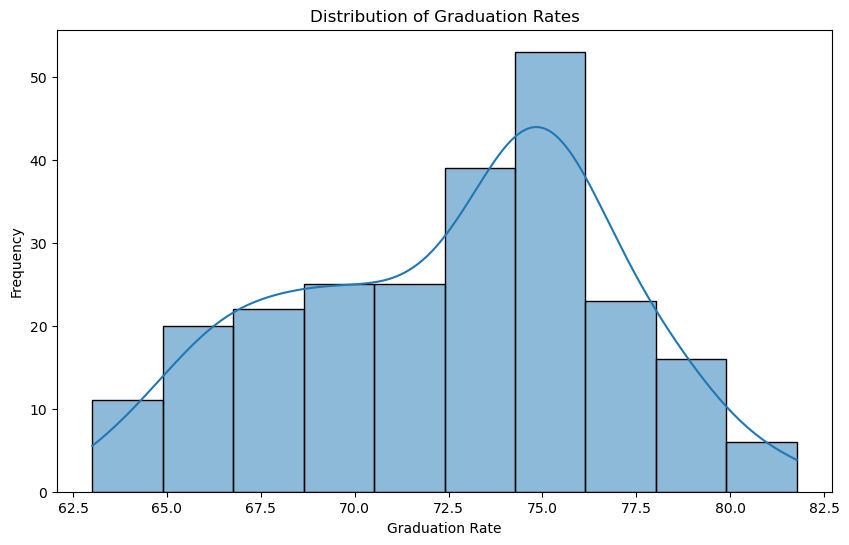

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of graduation rates
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[merged_df['Variable'] == 'Grad_Rate']['Value'], kde=True)
plt.title('Distribution of Graduation Rates')
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.show()


## Distribution of Graduation Rates
### The first visualization shows the distribution of graduation rates across various states. From this histogram, we can observe that most states have graduation rates clustered around the 70% to 77% range. The peak of the distribution is around 75%, indicating that this is the most common graduation rate among the states. The distribution tails off at both ends, with fewer states having very low or very high graduation rates. This suggests that while there is some variation, the majority of states have similar graduation rates, hovering around the 75% mark.

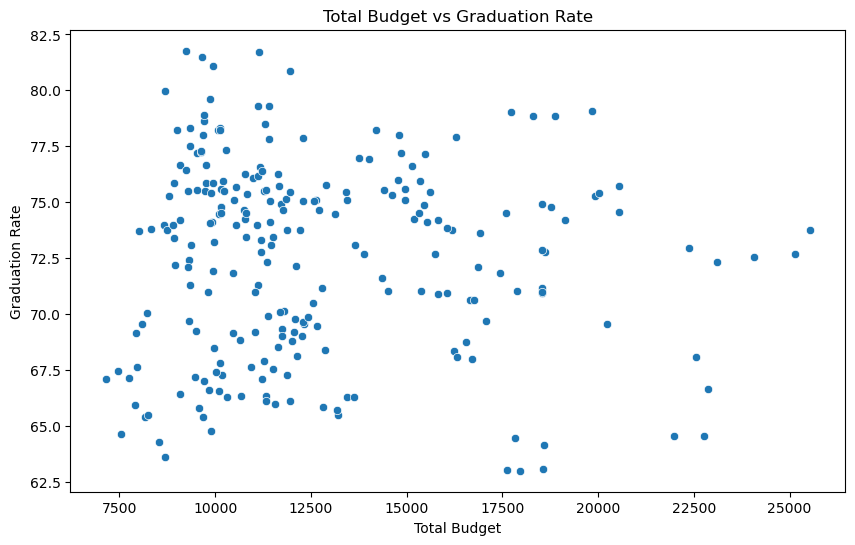

In [15]:
# Visualize the relationship between funding and graduation rates
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalBudget', y=merged_df[merged_df['Variable'] == 'Grad_Rate']['Value'], data=merged_df)
plt.title('Total Budget vs Graduation Rate')
plt.xlabel('Total Budget')
plt.ylabel('Graduation Rate')
plt.show()

## Total Budget vs Graduation Rate
### The second visualization is a scatter plot that explores the relationship between the total budget allocated per pupil and the graduation rates. Each point on the scatter plot represents a state, with its corresponding total budget and graduation rate.

Interestingly, there is no clear linear relationship between the total budget and graduation rates. While one might expect that higher funding would directly correlate with higher graduation rates, the scatter plot shows a more complex picture. There are states with high budgets and varying graduation rates, as well as states with lower budgets and both high and low graduation rates. This indicates that while funding is an important factor, it is not the sole determinant of graduation success. Other factors, such as educational policies, community support, and socio-economic conditions, likely play significant roles as well.

These visualizations collectively highlight that graduation rates are generally consistent across states but are influenced by more than just financial resources. This points to the need for a holistic approach in improving educational outcomes, considering multiple facets beyond just the budget.


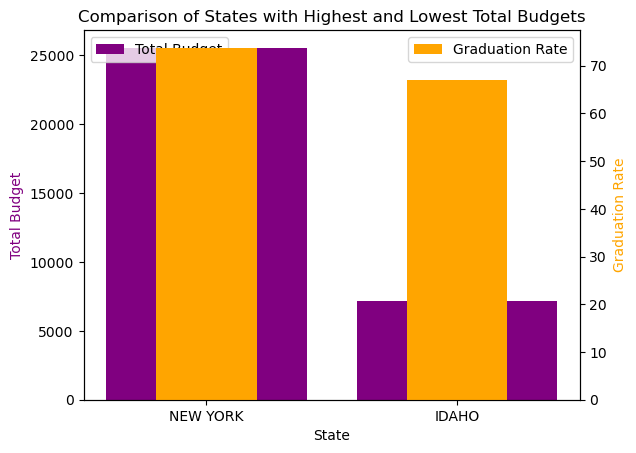

In [19]:
# Find the states with the highest and lowest total budgets
max_budget_state = merged_df.loc[merged_df['TotalBudget'].idxmax()]
min_budget_state = merged_df.loc[merged_df['TotalBudget'].idxmin()]

# Extract relevant information
comparison_data = pd.DataFrame({
    'State': [max_budget_state['STATE'], min_budget_state['STATE']],
    'Total Budget': [max_budget_state['TotalBudget'], min_budget_state['TotalBudget']],
    'Graduation Rate': [max_budget_state['Value'], min_budget_state['Value']]
})

# Plotting
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(comparison_data['State'], comparison_data['Total Budget'], color='purple', label='Total Budget')
ax2.bar(comparison_data['State'], comparison_data['Graduation Rate'], color='orange', label='Graduation Rate', width=0.4)

ax1.set_xlabel('State')
ax1.set_ylabel('Total Budget', color='purple')
ax2.set_ylabel('Graduation Rate', color='orange')
plt.title('Comparison of States with Highest and Lowest Total Budgets')

# Adding a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

### The chart above provides an insightful comparison between two states: New York, with the highest education budget, and Idaho, with the lowest. On the left, we see New York's total budget towering over Idaho's, reflecting significant financial investment in education. Despite this substantial difference in funding, the graduation rates, represented by the orange bars, show a different story.

### Interestingly, Idaho, with its comparatively smaller budget, manages to maintain a graduation rate that is not drastically lower than New York's. This visualization highlights an important point: while funding is crucial, it's not the sole factor determining educational outcomes. Various elements, such as resource allocation, educational policies, community support, and teaching quality, play vital roles in shaping student success.

### This comparison prompts us to consider how different states utilize their resources and what strategies could be implemented to enhance graduation rates effectively, regardless of the budget constraints.

In [33]:

# Load the data
state_funding_df = pd.read_csv('C:/Users/user/Desktop/StateEdFundingImpact/data/state_funding_df.csv')
merged_state_grads_df = pd.read_csv('C:/Users/user/Desktop/StateEdFundingImpact/data/state_funding_impact_melted.csv')
# Merge the dataframes on STATE 
combined_df = pd.merge(state_funding_df, merged_state_grads_df, on=['STATE'], how='inner')
print(combined_df.columns)

Index(['Unnamed: 0', 'YEAR_x', 'STATE', 'StateFIP', 'CensusRegion',
       'CensusDivision', 'FiscalEffortPercentage',
       'FiscalEffortIncomePercentage', 'PredictedCostPerPupilState',
       'ActualSpendingPerPupilState', 'StateEnrollment', 'TeacherSalary25_30',
       'NonTeacherSalary25_30', 'TeacherSalary31_40', 'NonTeacherSalary31_40',
       'TeacherSalary41_50', 'NonTeacherSalary41_50', 'TeacherSalary51_60',
       'NonTeacherSalary51_60', 'SalaryParityAge25', 'SalaryParityAge35',
       'SalaryParityAge45', 'SalaryParityAge55', 'TotalTeacherSalary',
       'YEAR_y', 'Variable', 'Value'],
      dtype='object')


## Seeing if there is a Correlation with Teacher Salary and Graduation Rate

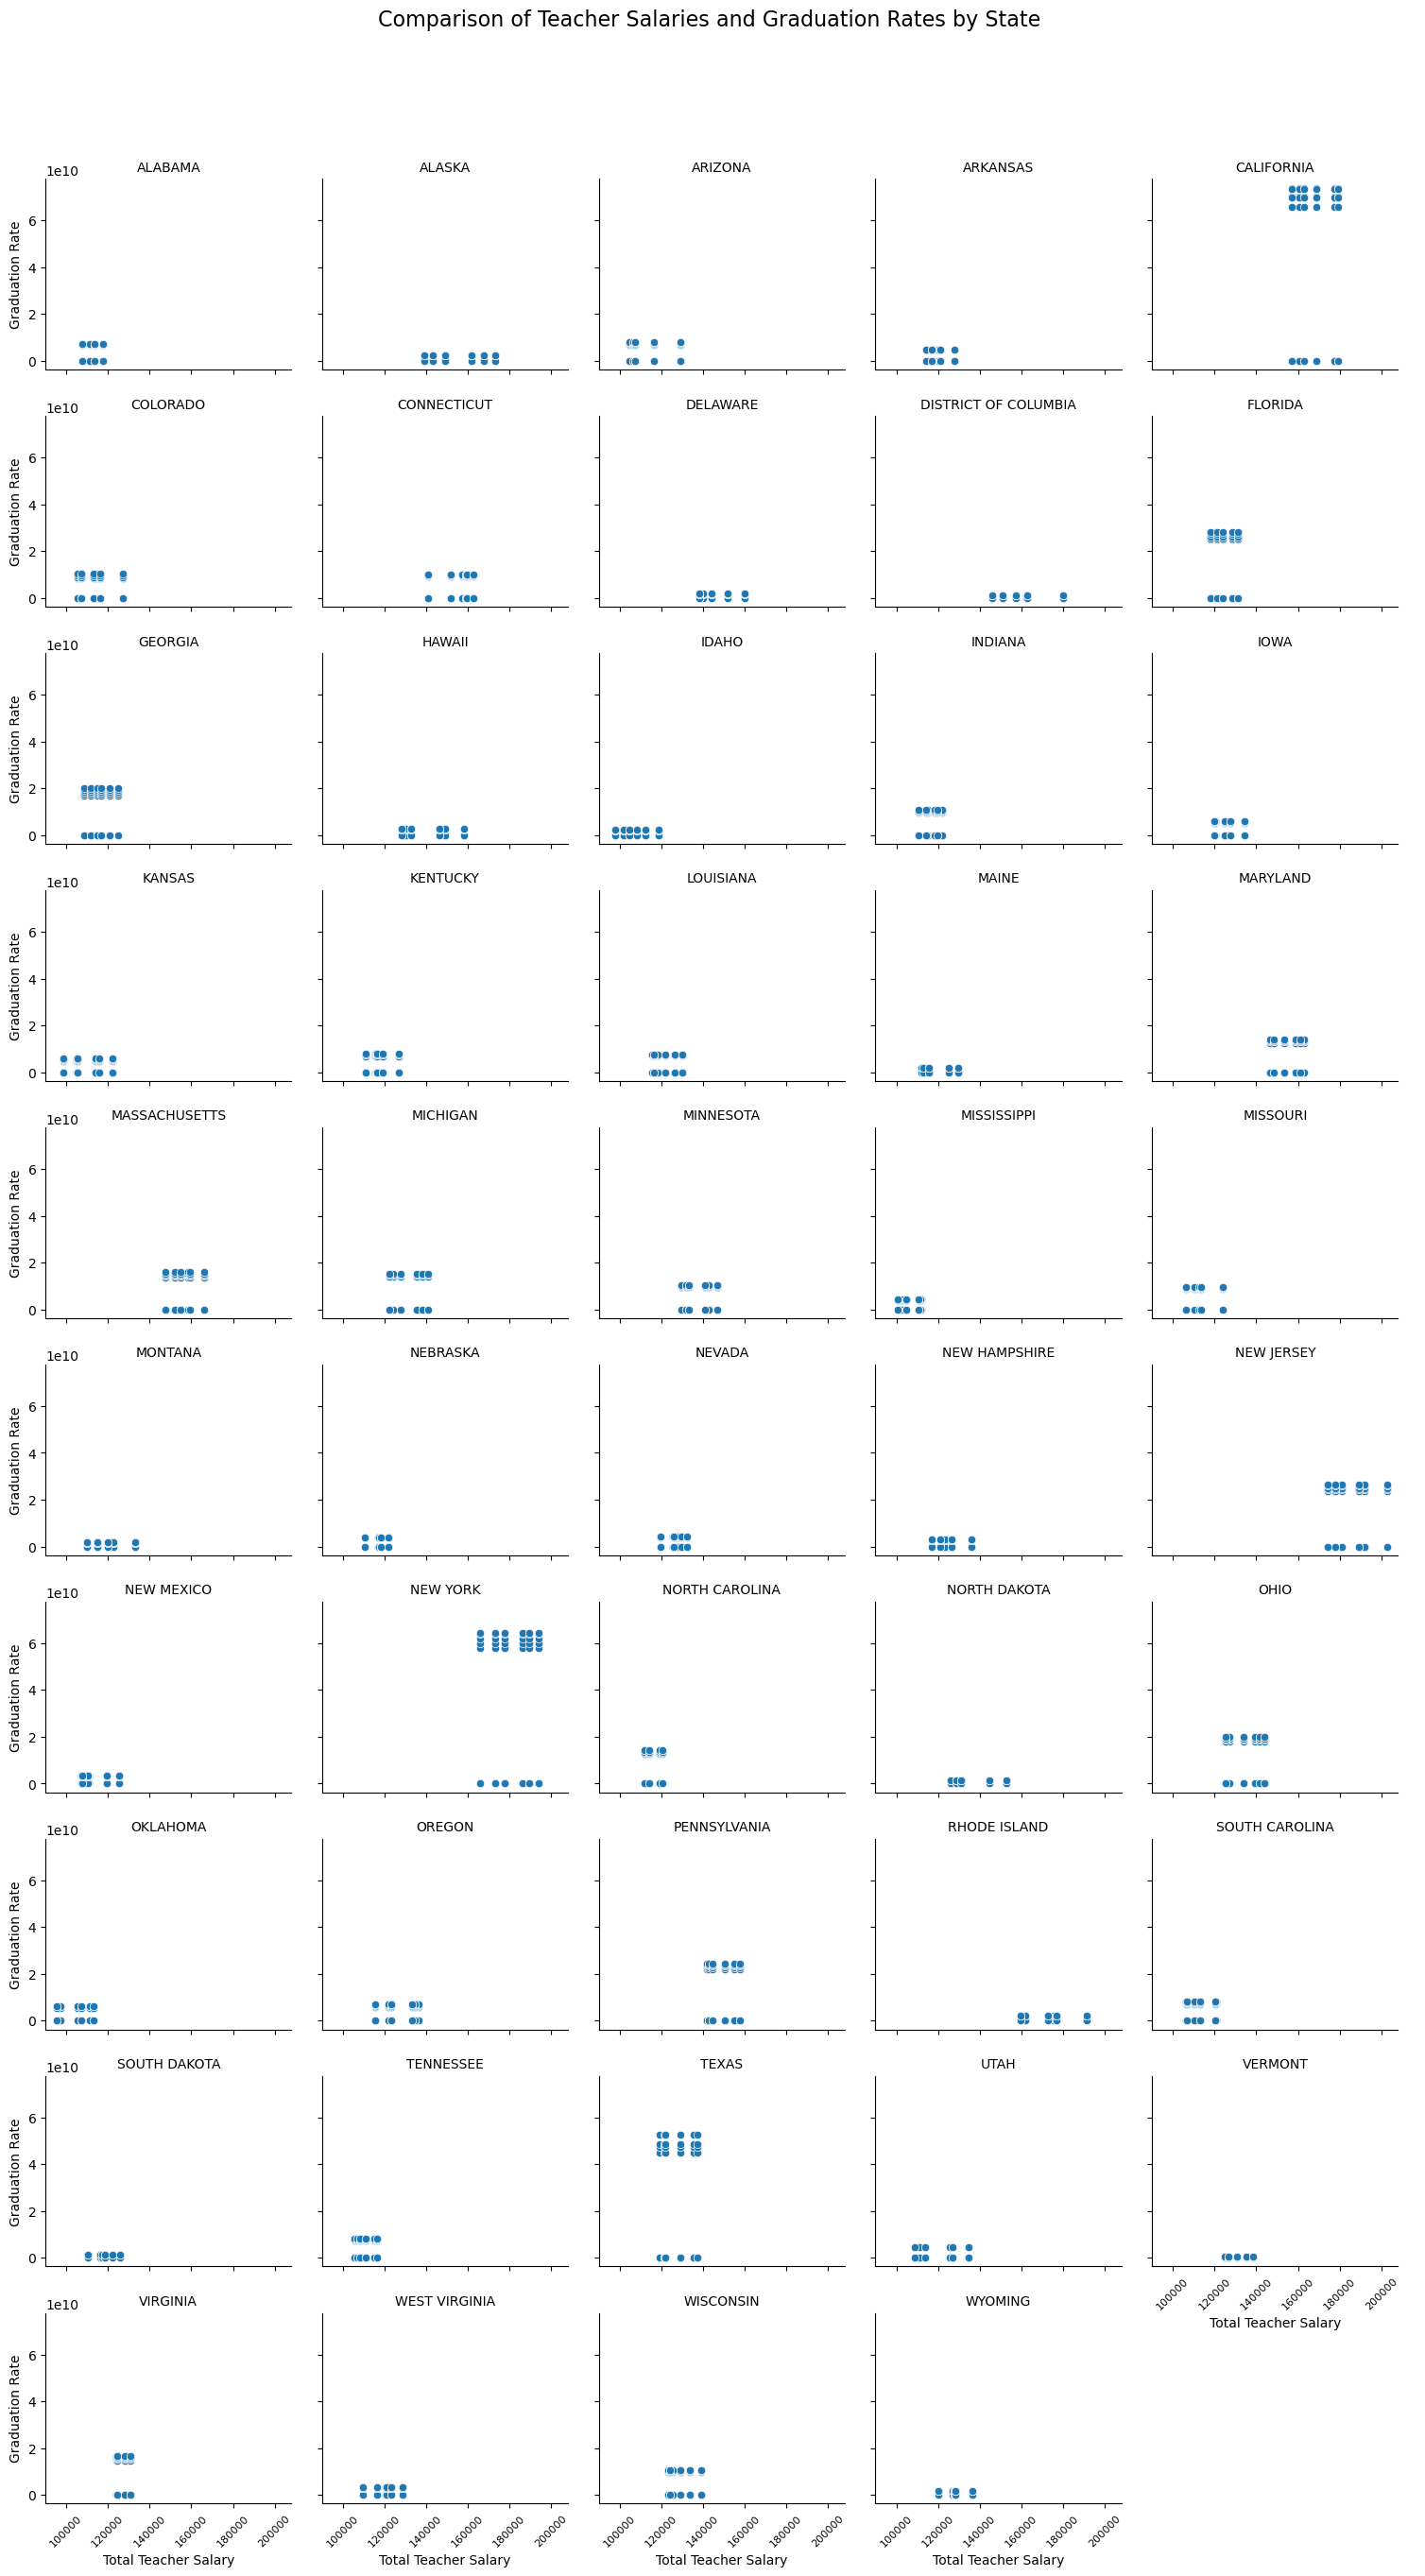

In [37]:
# Faceted scatter plot
g = sns.FacetGrid(teacher_salary_grad_rate_df, col='STATE', col_wrap=5, height=3, aspect=1)
g.map(sns.scatterplot, 'TotalTeacherSalary', 'Value')
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Total Teacher Salary", "Graduation Rate")

# Adjust x-axis labels
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_fontsize(8)

plt.subplots_adjust(top=0.92, bottom=0.1)
g.fig.suptitle('Comparison of Teacher Salaries and Graduation Rates by State', fontsize=16)

plt.show()

## Key Observations of Teacher Salaries Impacting Graduation Rates:
### Variability Across States:

The plots show significant variability in both teacher salaries and graduation rates across different states.
Some states have clusters of data points, indicating a consistent pattern, while others show a wider spread.

### High Salary and High Graduation Rates:

States like Alaska, New York, and New Jersey appear to have higher teacher salaries and higher graduation rates.
These states show a cluster of points towards the higher end of both axes, suggesting a positive correlation between teacher salaries and graduation rates.

### Low Salary and Lower Graduation Rates:

States such as Mississippi, Arizona, and Idaho tend to have lower teacher salaries and lower graduation rates.
The data points for these states are clustered towards the lower end of the axes.

### No Clear Correlation in Some States:

In some states, like California and Texas, the plots do not show a clear trend or pattern between teacher salaries and graduation rates.
The scatter of points suggests that other factors might be influencing graduation rates besides teacher salaries.

### Outliers and Anomalies:

Some states have outliers where the graduation rate is exceptionally high or low for the given teacher salary.
These anomalies indicate that while salary is an important factor, it is not the sole determinant of graduation rates.

### Conclusion:
Overall, the analysis suggests a general trend where higher teacher salaries are associated with higher graduation rates. However, this correlation is not uniform across all states, indicating that other factors also play a significant role in determining graduation outcomes. Further investigation into additional variables, such as funding allocation, student-teacher ratios, and socio-economic conditions, would provide a more comprehensive understanding of the factors influencing graduation rates.



# Overall Analysis

## The Questions We Asked:
* What is the distribution of graduation rates across states?
* How does the total budget allocated to education relate to graduation rates?
* Which states have the highest and lowest total education budgets, and how do their graduation rates compare?
* Is there a correlation between teacher salaries and graduation rates across states?
* What other factors might influence graduation rates besides budget and teacher salaries?

## The Trends We Investigated:
### Distribution of Graduation Rates:
We explored how graduation rates are distributed across different states to understand the overall performance and identify any outliers.

### Total Budget vs Graduation Rates:
We examined the relationship between the total budget allocated to education and the graduation rates to see if higher spending correlates with better outcomes.

### Comparison of States with Highest and Lowest Budgets:
We compared the states with the highest and lowest total education budgets to see how their graduation rates differ and to identify any significant disparities.

### Teacher Salaries vs Graduation Rates:
We investigated the correlation between teacher salaries and graduation rates to understand if better compensation for teachers leads to higher student success.

## The Resulting Visualizations and Conclusions
### Distribution of Graduation Rates:

Conclusion: The distribution shows a peak around the 75-77% graduation rate range, indicating that most states have graduation rates within this range. There are a few outliers with significantly higher or lower rates.

### Total Budget vs Graduation Rates:

Conclusion: The scatter plot indicates no clear linear relationship between total budget and graduation rates. This suggests that factors other than just the total budget might significantly influence graduation rates.

### Comparison of States with Highest and Lowest Budgets:

Conclusion: New York, with the highest budget, has a graduation rate comparable to Idaho, which has a much lower budget. This highlights that higher spending does not necessarily equate to significantly higher graduation rates.

### Teacher Salaries vs Graduation Rates:

Conclusion: The plots show variability in the correlation between teacher salaries and graduation rates. Some states with higher teacher salaries tend to have higher graduation rates, but this trend is not consistent across all states. It indicates that while teacher salary is a factor, other variables also significantly impact graduation rates.

# Overall Conclusion:
### The analysis reveals that while higher budgets and teacher salaries can correlate with better graduation rates, these factors alone do not fully explain the differences in graduation outcomes across states. Other factors, such as socio-economic conditions, student-teacher ratios, and specific state education policies, likely play critical roles. Further investigation into these additional factors would provide a more comprehensive understanding of the determinants of graduation rates.